In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
from google.colab import files as f
up=f.upload()

Saving Salary_Data.csv to Salary_Data.csv
Saving Problem_statements.txt to Problem_statements.txt
Saving delivery_time.csv to delivery_time.csv


In [ ]:
with open("Problem_statements.txt","r") as f:
    print(f.read())

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


---
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

# **(1) Prediction model for delivery time**




In [121]:
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
df.shape

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [ ]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

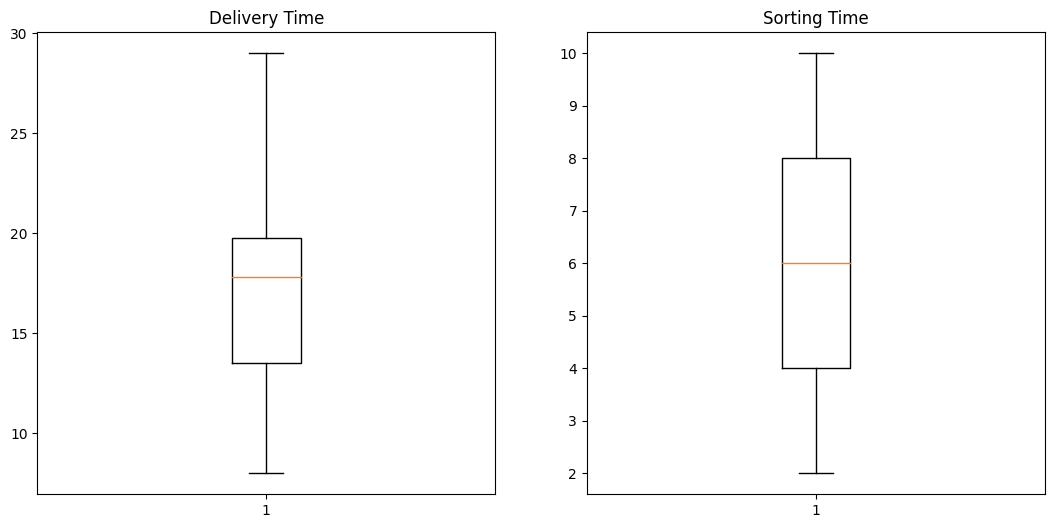

In [12]:
plt.subplots(figsize=(13,6))
plt.subplot(121)
plt.boxplot(df.iloc[:,0])
plt.title(df.columns[0])
plt.subplot(122)
plt.boxplot(df.iloc[:,1])
plt.title(df.columns[1]);

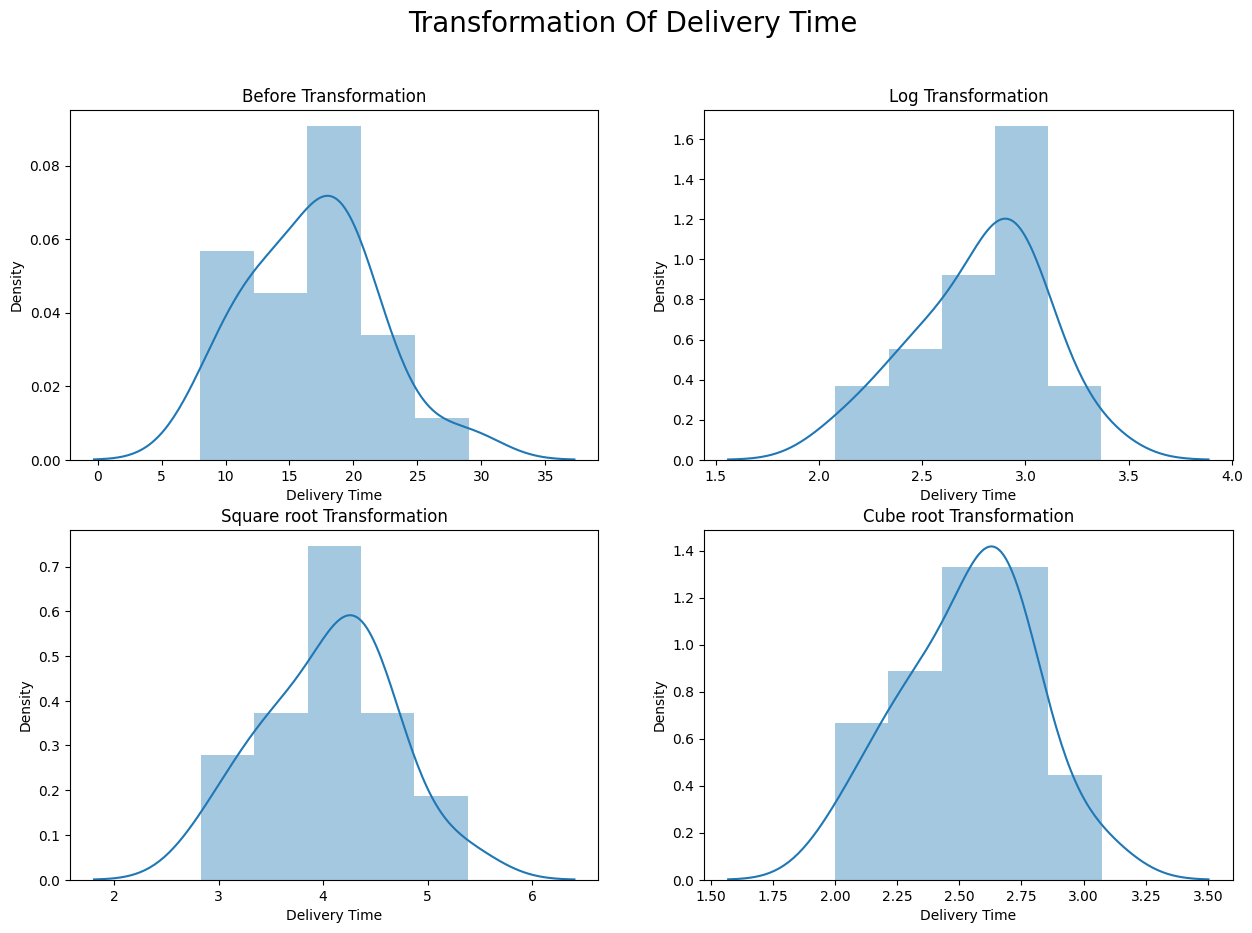

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Transformation Of Delivery Time",fontsize=20)
sns.distplot(df["Delivery Time"],ax=ax[0,0],)
ax[0,0].set_title("Before Transformation")
sns.distplot(np.log(df["Delivery Time"]),ax=ax[0,1])
ax[0,1].set_title("Log Transformation")
sns.distplot(np.sqrt(df["Delivery Time"]),ax=ax[1,0])
ax[1,0].set_title("Square root Transformation")
sns.distplot(np.cbrt(df["Delivery Time"]),ax=ax[1,1])
ax[1,1].set_title("Cube root Transformation");


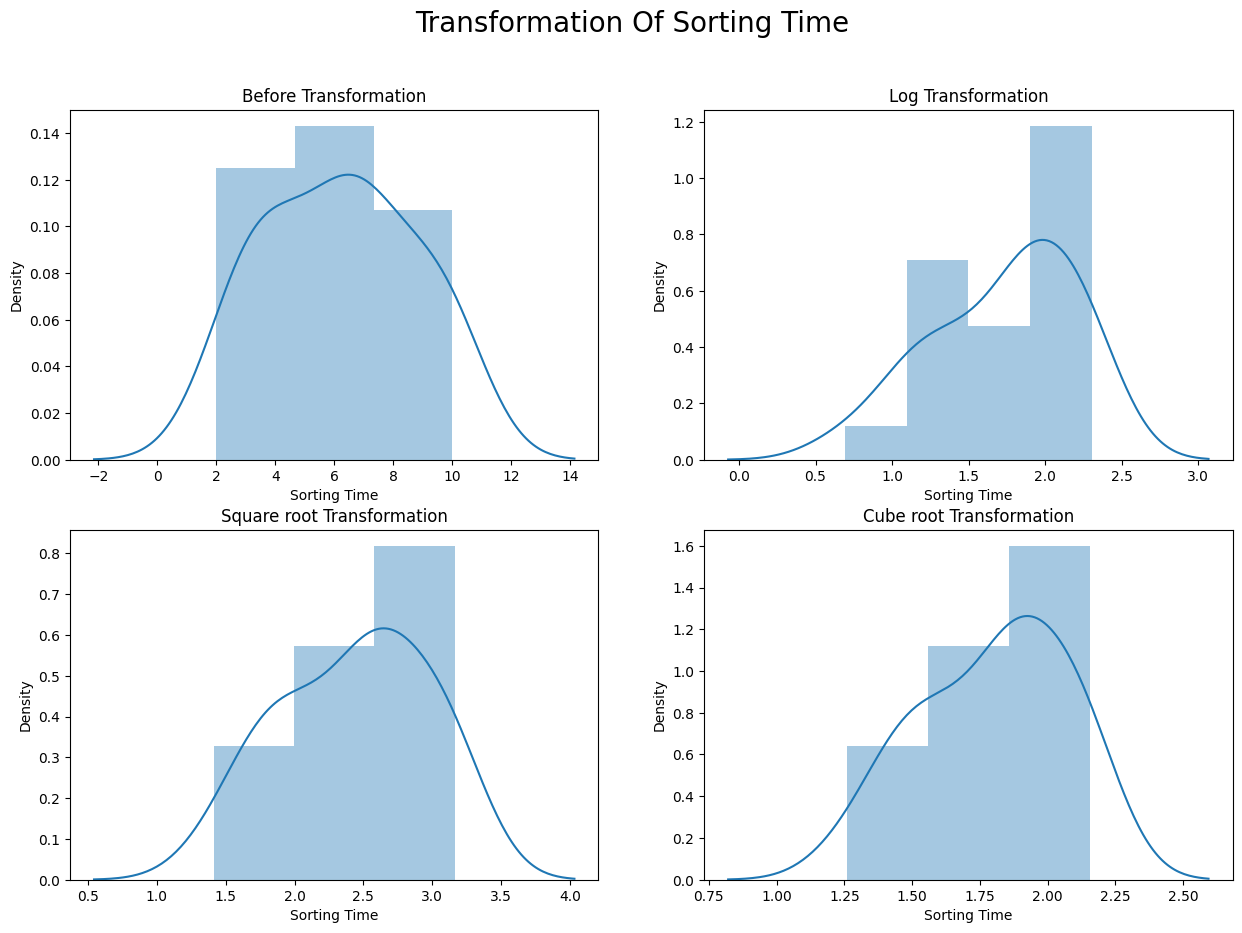

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Transformation Of Sorting Time",fontsize=20)
sns.distplot(df["Sorting Time"],ax=ax[0,0],)
ax[0,0].set_title("Before Transformation")
sns.distplot(np.log(df["Sorting Time"]),ax=ax[0,1])
ax[0,1].set_title("Log Transformation")
sns.distplot(np.sqrt(df["Sorting Time"]),ax=ax[1,0])
ax[1,0].set_title("Square root Transformation")
sns.distplot(np.cbrt(df["Sorting Time"]),ax=ax[1,1])
ax[1,1].set_title("Cube root Transformation");

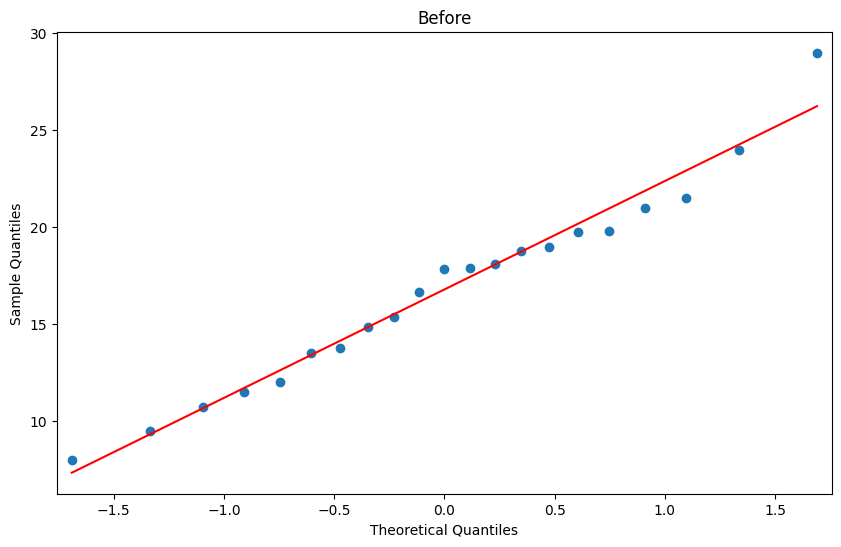

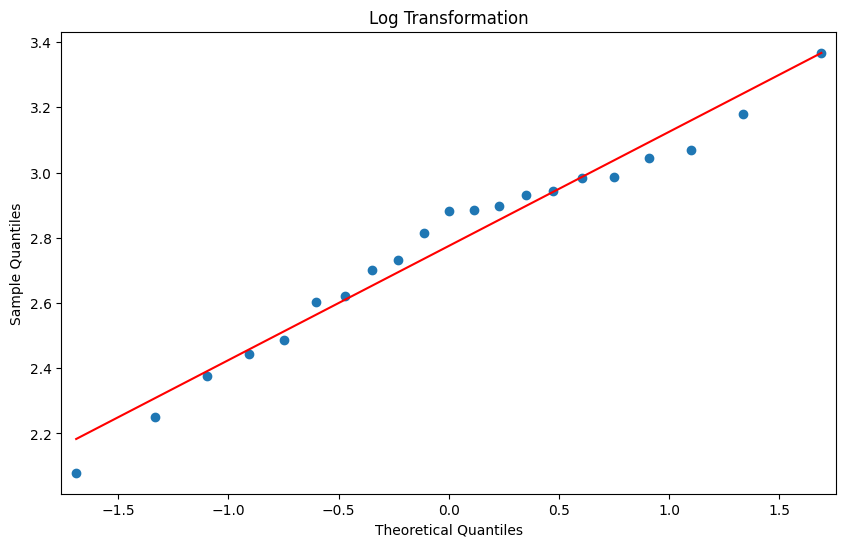

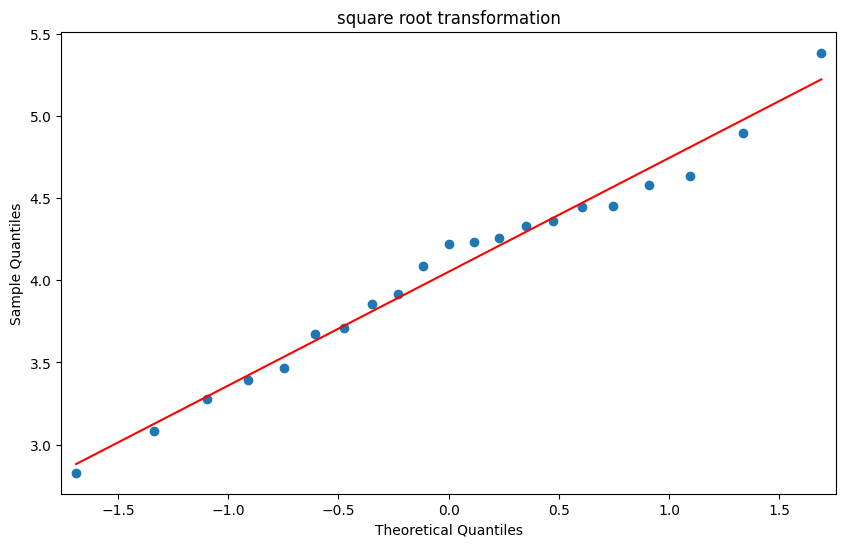

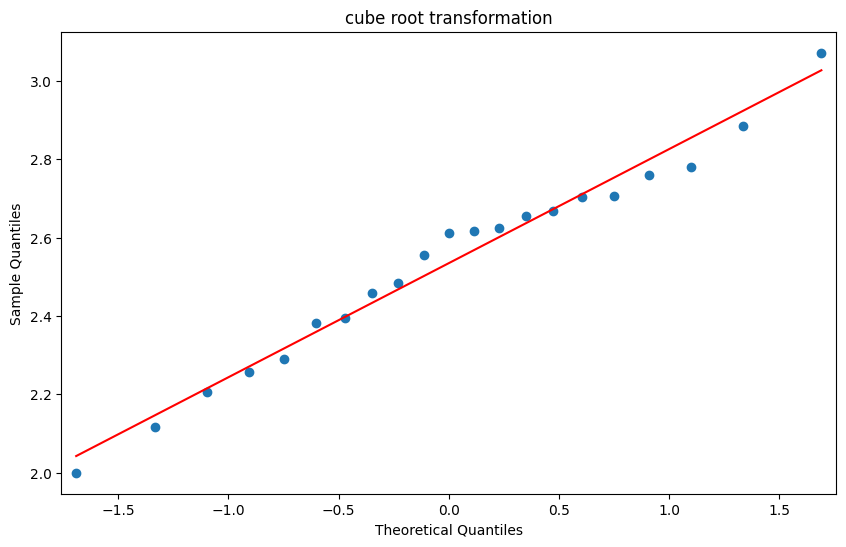

In [15]:
sm.qqplot(df["Delivery Time"],line="r");
plt.title("Before")
sm.qqplot(np.log(df["Delivery Time"]),line="r")
plt.title("Log Transformation");
sm.qqplot(np.sqrt(df["Delivery Time"]),line="r");
plt.title("square root transformation")
sm.qqplot(np.cbrt(df["Delivery Time"]),line="r")
plt.title("cube root transformation");

In [ ]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

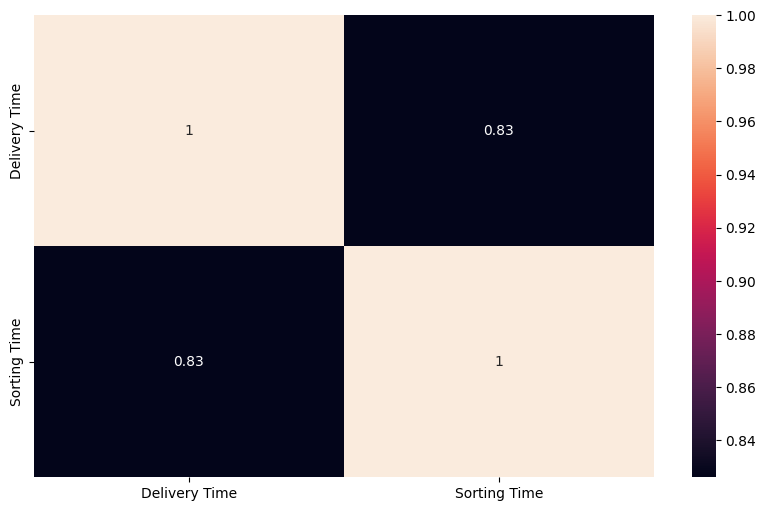

In [23]:
sns.heatmap(df.corr(),annot=True)

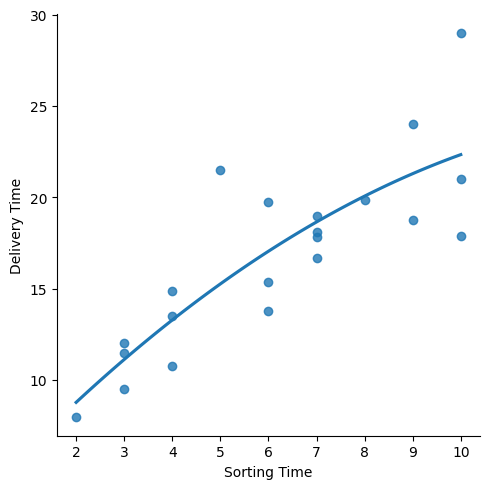

In [26]:
sns.lmplot(y="Delivery Time",x="Sorting Time",data=df,order = 2, ci = None)

In [38]:
def data_split(n,random_st=1):
    global X,y,x_train,x_test,y_train,y_test
    from sklearn.model_selection import train_test_split
    if n==1:
        y=df["Delivery Time"]
        X=df["Sorting Time"]
    elif n==2:
        y=np.log(df["Delivery Time"])
        X=np.log(df["Sorting Time"])
    elif n==3 :
        y=np.sqrt(df["Delivery Time"])
        X=np.sqrt(df["Sorting Time"])
    elif n==4 :
        y=np.cbrt(df["Delivery Time"])
        X=np.cbrt(df["Sorting Time"])
    a,b,c,d=train_test_split(X,y,train_size=.8,random_state=random_st)
    x_train=np.array(a).reshape(-1,1)
    x_test=np.array(b).reshape(-1,1)
    y_train=np.array(c).reshape(-1,1)
    y_test=np.array(d).reshape(-1,1)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [45]:
def build_model():
    global y_train_pred,y_test_pred,tr,ts
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    tr=model.score(x_train,y_train)
    ts=model.score(x_test,y_test)
    print(f"Train accuracy : {tr}\nTest accracy : {ts}")
    return model

In [103]:
from sklearn.metrics import r2_score
def view_model(tt,mode=1):
    train_score=round(r2_score(y_train,y_train_pred)*100,2)
    test_score=round(r2_score(y_test,y_test_pred)*100,2)
    msee=mse(y_train,y_train_pred)
    fig,ax=plt.subplots(figsize=(14,7))
    plt.subplot(121)
    plt.scatter(x_train,y_train)
    plt.plot(x_train,y_train_pred,color="red")
    plt.title("Training data")
    plt.xlabel(X.name)
    plt.ylabel(y.name)
    if mode==1:
        plt.annotate("model",xytext=(np.median(x_train),y_train.min()),xy=(np.median(x_train),np.median(y_train_pred)),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
    else:
        plt.legend(["data points","model"],loc="lower right")
    plt.text(x_train.min(),y_train.max(),f"Accuracy={round(tr*100,2)}",fontweight="bold")
    plt.subplot(122)
    plt.scatter(x_test,y_test)
    plt.plot(x_test,y_test_pred,color="red")
    plt.title("Testing data")
    if mode==1:
        plt.annotate("model",xytext=(np.median(x_train),y_train.min()),xy=(np.median(x_train),np.median(y_train_pred)),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
    else:
        plt.legend(["data points","model"],loc="lower right")
    plt.xlabel(X.name)
    plt.text(x_test.min(),plt.yticks()[0][-2],f"Accuracy={round(ts*100,2)}",fontweight="bold")
    plt.ylabel(y.name)
    plt.suptitle(tt,fontweight="bold",fontsize=15)
    return train_score,test_score,msee;

Train accuracy : 0.6256911971931693
Test accracy : 0.8072586659538643


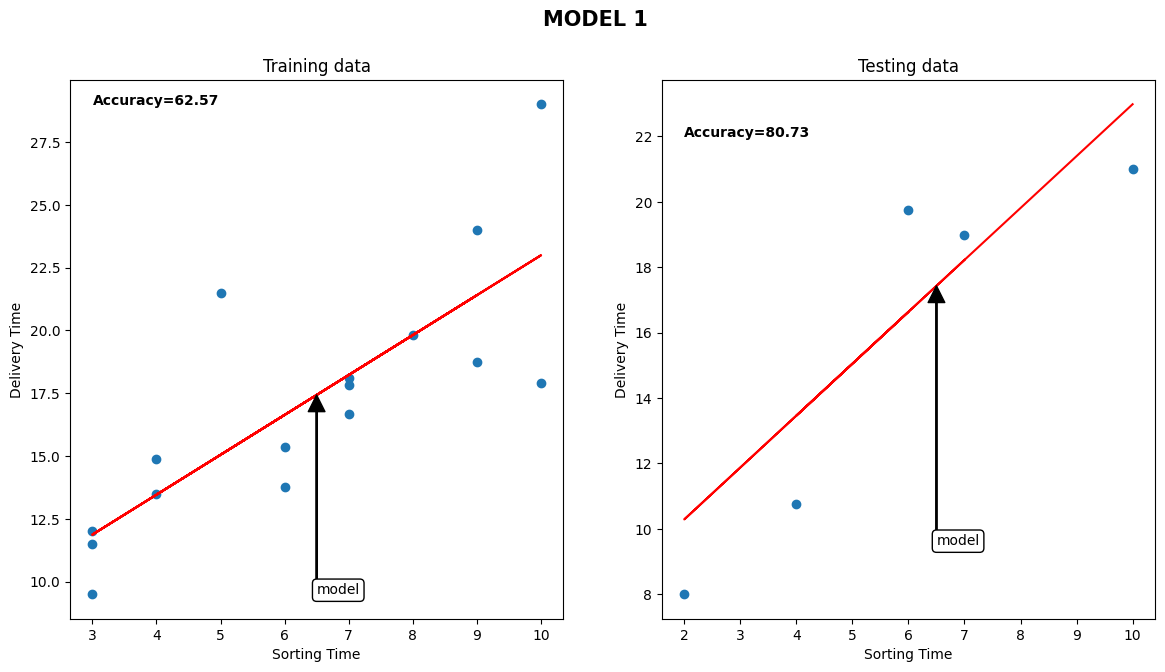

In [122]:
#without any transformation
data_split(1,random_st=25)
model_1=build_model()
tr1,ts1,mse1=view_model("MODEL 1");

Train accuracy : 0.6942914641032654
Test accracy : 0.8684891510299543


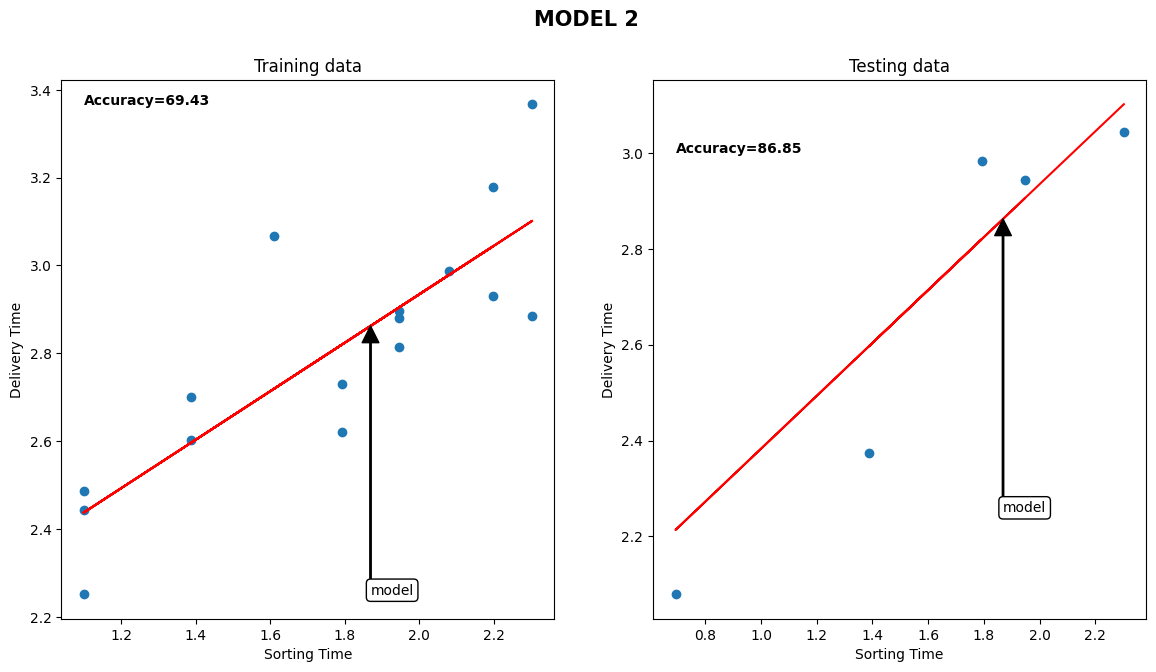

In [123]:
#Log transformation
data_split(2,random_st=25)
model_2=build_model()
tr2,ts2,mse2=view_model("MODEL 2");

Train accuracy : 0.6606482289569573
Test accracy : 0.8422487052966584


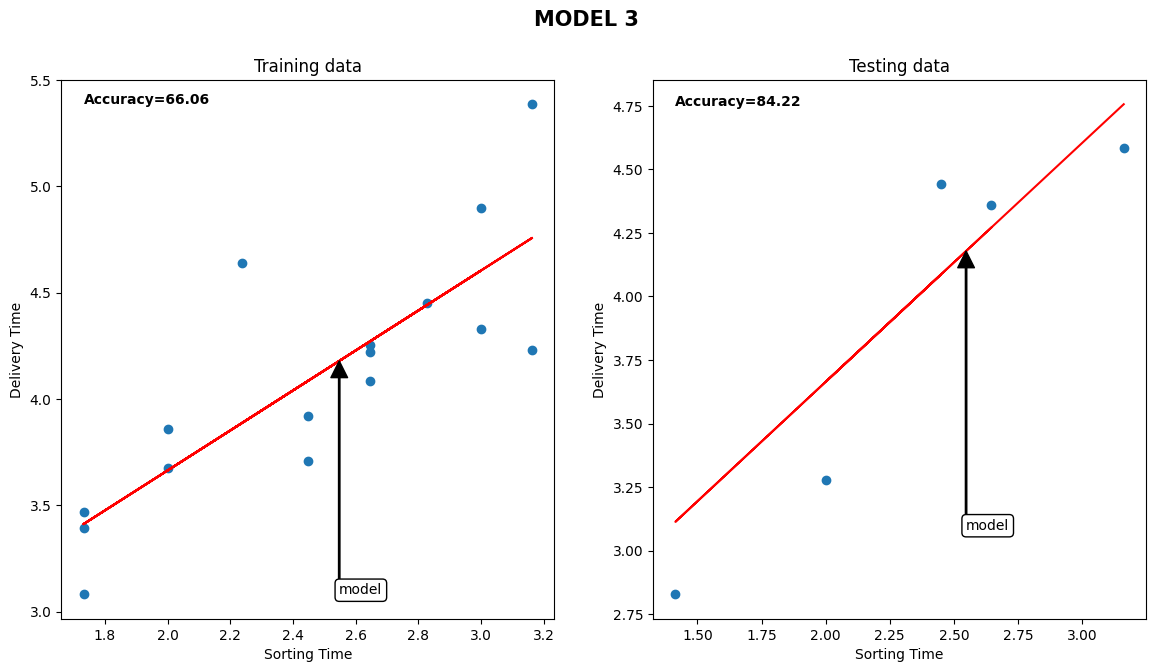

In [124]:
#square root transformation
data_split(3,random_st=25)
model_3=build_model()
tr3,ts3,mse3=view_model("MODEL 3");

Train accuracy : 0.6721368575847653
Test accracy : 0.8517583926364082


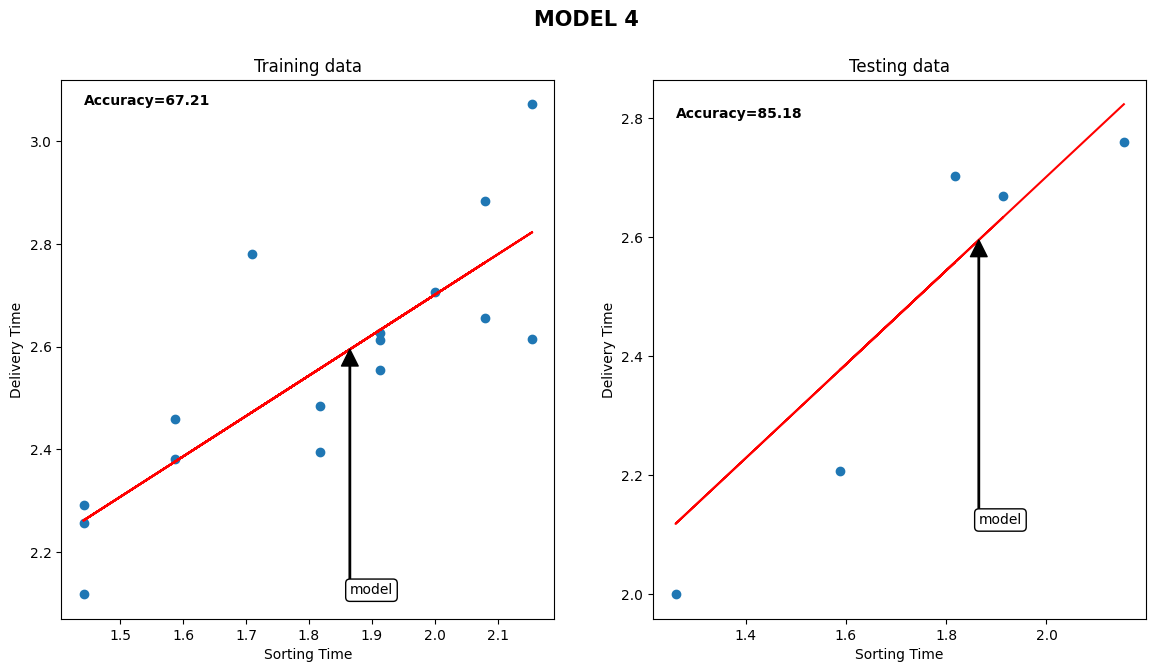

In [125]:
#cube root transformation
data_split(4,random_st=25)
model_4=build_model()
tr4,ts4,mse4=view_model("MODEL 4");

In [126]:
#mean squared error of  models
#print(f"MSE of Model 1 : {mse1}\nMSE of model 2 : {mse2}\nMSE of Model 3 : {mse3}\nMSE of Model 4 : {mse4}\n")
comparison_df=lambda : pd.DataFrame({"Models":["Model 1","Model 2","Model 3","Model 4"],"Transformarion":["no","log","square root","cube root"],"Train Score":[tr1,tr2,tr3,tr4],"Test Score":[ts1,ts2,ts3,ts4],"MSE":[mse1,mse2,mse3,mse4]})
comparison_df()

,Models,Transformarion,Train Score,Test Score,MSE
0,Model 1,no,62.57,80.73,8.611602
1,Model 2,log,69.43,86.85,0.023394
2,Model 3,square root,66.06,84.22,0.109791
3,Model 4,cube root,67.21,85.18,0.018265


# **Model 2 with log transformation has better accuracy and least mean squared error**

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

---

